# VGG-16 (A Brief Introduction)

VGG-16 is a 16 layer convolutional neural network which focuses on smaller kernels of size 3 by 3 and smaller strides of 1 or 2. Because of its architecture it is able to classify 1000 images of 1000 different categories with an accuracy of 92.7% (Rohini G., 2021).

__This information of VGG-16 was obtained from:__
Rohini G. (23/09/2023), *Everything you need to know about VGG16*, retrieved on 09/12/2024 from: https://medium.com/@mygreatlearning/everything-you-need-to-know-about-vgg16-7315defb5918

__The VGG-16 code has been adapted from:__
datamagic2020 (2022) *Flower classification using transfer-learning-with-VGG16*, retrieved on 09/12/2024 fromL:<https://github.com/datamagic2020/transfer-learning-with-VGG16/blob/main/Transfer_Learning_with_VGG16_for_Flower_classification.ipynb>

# Import The Relevant Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
import tensorflow as tf
import cv2
from tensorflow.keras.optimizers import Adam

In [2]:
from tensorflow.keras.utils import to_categorical

In [3]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

# Loading and Preprocessing The Data

In [4]:
# Set batch_size for network
batch_size = 32

In [5]:
# Load Data and Make sure It is Divisible By The Batch_Size
def load_and_truncate(data_class, data_fol = "CNN_Data", batch_size = 32):
    """
    Loads the data and labels. If the user wants to use a particular
    batch_size for training the data then the data and labels
    are truncated such that they are divisible by the batch size.

    Parameters
    ----------
    data_class : str
        Whether the data is "Train", "Test" or "Validation".

    data_fol : str, default = "CNN_Data"
        The folder path of the images and labels.
        
    batch_size : int, default 32
        The batch size you intend to use for the neural network.

    Returns
    -------
    imgs : numpy array
        Arrays containing the relevant collection of images.

    labels : numpy array
        An arrays containing the relevant collection of labels.
    """
    imgs = np.load(f"{data_fol}/{data_class}/{data_class}_Imgs.npy")
    labels = np.load(f"{data_fol}/{data_class}/{data_class}_Labels.npy")
    end_pt = len(labels) % batch_size

    imgs = imgs[:-end_pt]
    labels = labels[:-end_pt]

    return imgs, labels

In [6]:
train_imgs, train_labels = load_and_truncate("Train", batch_size = batch_size)
val_imgs, val_labels = load_and_truncate("Validation", batch_size = batch_size)
test_imgs, test_labels = load_and_truncate("Test", batch_size = batch_size)

In [7]:
# Encode the labels via One Hot Encoding
n_classes = 3
train_labels = to_categorical(train_labels, num_classes=n_classes)
val_labels = to_categorical(val_labels, num_classes=n_classes)
test_labels = to_categorical(test_labels, num_classes=n_classes)

In [8]:
# Preprocess the images
train_imgs = preprocess_input(train_imgs) 
test_imgs = preprocess_input(test_imgs)
val_imgs = preprocess_input(val_imgs)

# Implementing VGG-16 CNN Model 

In [9]:
# Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=train_imgs[0].shape)

In [10]:
# Will not train the convolutional layers
base_model.trainable = False 

In [11]:
# Base model summary
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 120, 120, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 120, 120, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 120, 120, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 60, 60, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 60, 60, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 60, 60, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 30, 30, 128)       0     

In [12]:
# Add the Fully-Connected Layers

from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(4096, activation='relu')
dense_layer_2 = layers.Dense(4096, activation='relu')
prediction_layer = layers.Dense(n_classes, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [13]:
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import SGD

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [14]:
epochs = 100
history = model.fit(train_imgs, train_labels, shuffle = True, epochs=epochs, validation_data=(val_imgs, val_labels), batch_size=batch_size)

Epoch 1/100
73/73 [==============================] - 14s 36ms/step - loss: 2.8384 - accuracy: 0.3857 - val_loss: 0.9574 - val_accuracy: 0.4970
Epoch 2/100
73/73 [==============================] - 2s 32ms/step - loss: 0.9615 - accuracy: 0.5009 - val_loss: 1.0392 - val_accuracy: 0.4476
Epoch 3/100
73/73 [==============================] - 2s 32ms/step - loss: 0.9511 - accuracy: 0.5188 - val_loss: 1.0559 - val_accuracy: 0.4486
Epoch 4/100
73/73 [==============================] - 2s 32ms/step - loss: 0.9908 - accuracy: 0.4820 - val_loss: 0.9737 - val_accuracy: 0.4788
Epoch 5/100
73/73 [==============================] - 2s 32ms/step - loss: 0.9531 - accuracy: 0.5128 - val_loss: 0.9753 - val_accuracy: 0.5212
Epoch 6/100
73/73 [==============================] - 2s 32ms/step - loss: 0.9654 - accuracy: 0.4910 - val_loss: 0.9462 - val_accuracy: 0.4889
Epoch 7/100
73/73 [==============================] - 2s 32ms/step - loss: 0.9472 - accuracy: 0.5180 - val_loss: 0.9577 - val_accuracy: 0.5292
Epoch

# Plot The Loss and Accuracy Curves

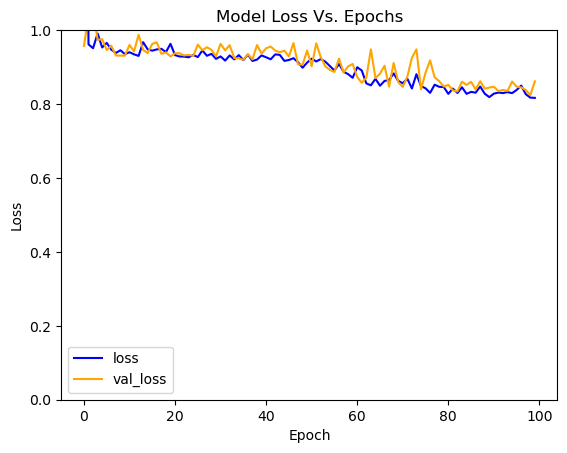

In [15]:
plt.plot(history.history['loss'],'b-')
plt.plot(history.history['val_loss'],'orange')
plt.legend(['loss', 'val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim((0,1))
plt.title('Model Loss Vs. Epochs')
plt.show()

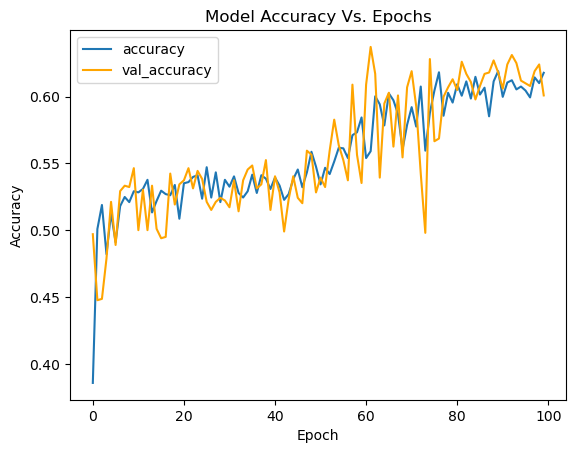

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'],'orange')
plt.legend(['accuracy', 'val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Vs. Epochs')
plt.show()

The training model appears to underfit the data since the training and validation losses remain much larger than 0.